# Task 4

In [1]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

@doc juliamap

juliamap(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


### What's going on?
The function juliamap() is executed in another function j0(z). This is an assignment form of a function assignment. In Julia, the imaginary part of a complex number can be written using im. So, j0( complex(1.1, 0.3) ) and j0( 1.1 + 0.3im) are identical and both outputs 3. The function linspace is the same as with Python. It creates an array of 100 elemnets between start(0.1) and end(0.3). The last line j0.(a) is an interesting syntax of Julia. Julia has element-wise operation tools, which apply a function to all array elements. In addition, when it is applied, the function becomes vectorized.

In [2]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Evaluate j0 on single complex points. Note: im is the imaginary unit in Julia
println( j0( complex(1.1, 0.3) ) )  # Recommended construction for complex numbers
println( j0( 1.1 + 0.3im ) )       # Equivalent result, but constructs z in 2 steps

# # Evaluate j0 across an array - the . notation automatically vectorizes any function
a = linspace(complex(0.1,0.3), complex(1.5,0.3), 100)
# list all array elments
println([v for v in a])
# print the array after the function applied on each element
println( j0.(a) )

3
3


Complex{Float64}[

0.1+0.3im, 0.114141+0.3im, 0.128283+0.3im, 0.142424+0.3im, 0.156566+0.3im, 0.170707+0.3im, 0.184848+0.3im, 0.19899+0.3im, 0.213131+0.3im, 0.227273+0.3im, 0.241414+0.3im, 0.255556+0.3im, 0.269697+0.3im, 0.283838+0.3im, 0.29798+0.3im, 0.312121+0.3im, 0.326263+0.3im, 0.340404+0.3im, 0.354545+0.3im, 0.368687+0.3im, 0.382828+0.3im, 0.39697+0.3im, 0.411111+0.3im, 0.425253+0.3im, 0.439394+0.3im, 0.453535+0.3im, 0.467677+0.3im, 0.481818+0.3im, 0.49596+0.3im, 0.510101+0.3im, 0.524242+0.3im, 0.538384+0.3im, 0.552525+0.3im, 0.566667+0.3im, 0.580808+0.3im, 0.594949+0.3im, 0.609091+0.3im, 0.623232+0.3im, 0.637374+0.3im, 0.651515+0.3im, 0.665657+0.3im, 0.679798+0.3im, 0.693939+0.3im, 0.708081+0.3im, 0.722222+0.3im, 0.736364+0.3im, 0.750505+0.3im, 0.764646+0.3im, 0.778788+0.3im, 0.792929+0.3im, 0.807071+0.3im, 0.821212+0.3im, 0.835354+0.3im, 0.849495+0.3im, 0.863636+0.3im, 0.877778+0.3im, 0.891919+0.3im, 0.906061+0.3im, 0.920202+0.3im, 0.934343+0.3im, 0.948485+0.3im, 0.962626+0.3im, 0.976768+0.3im, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Complex Plane Take 1
x has a transposed value of linspace(xmin, xmax, xpoints), so that it presents the array elements in rows. z uses element-wise operations on each value of the multi-demensional array (x and y). In Julia, interestingly, meshgrid is automatically applied, when combining y (columns) and x (rows).

In [3]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=200, ypoints=200)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

# The vectorized function can be applied directly to the plane
@time cplane = complex_plane()
@time j0p = j0.(cplane)

  0.238507 seconds (156.12 k allocations: 8.373 MiB)
 

 0.112652 seconds (76.04 k allocations: 4.445 MiB)


200×200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

### Complex Plane Take 2
In Julia, constructors are the instances of composite types. The instances of type objects serves as constructor functions. They get instantiated when applied to an argument tuple as a function. Type objects have a special local function new() which creates the object of the block type. So, new() works pretty much like \_\_init\_\_ method of Python class. And the instance of "mutable" struct can be modified as we see in the last line, cplane.z = j0(cplane.z). 

In [4]:
mutable struct ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Number,2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

cplane = ComplexPlane(xpoints=200,ypoints=200);
typeof(cplane)

print(typeof(cplane.x))
cplane.z = j0.(cplane.z)

LinSpace{Float64}

200×200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

### Plotting with PyPlot

In [5]:
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane(xpoints=1000,ypoints=1000)              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane
println(size(jp))

(1000, 1000)


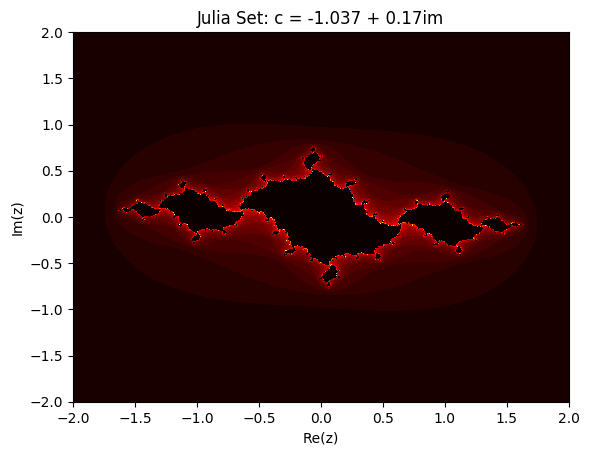

In [6]:
using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png") 

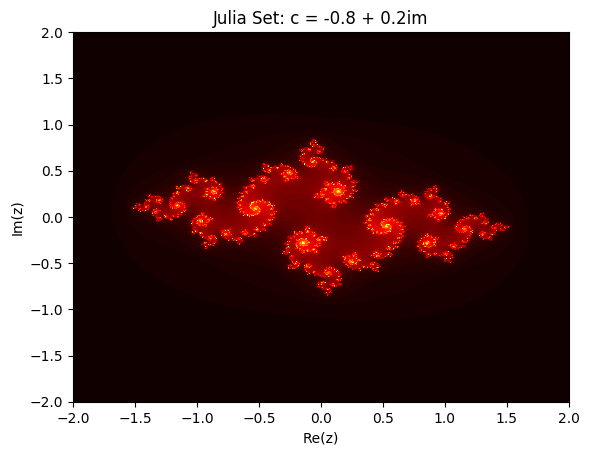

PyObject <matplotlib.collections.QuadMesh object at 0x7fafb7c13ad0>

In [7]:
c = -0.8 + 0.2im
j2(z) = juliamap(c, z)
jp2 = j2.(cplane.z)

figure(2)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp2, cmap=PyPlot.cm_get_cmap("hot"))

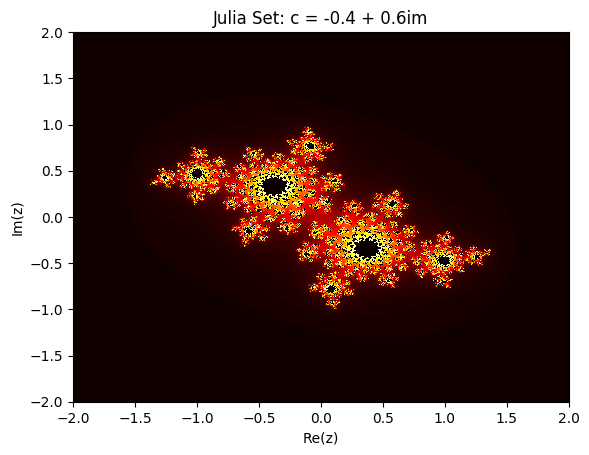

PyObject <matplotlib.collections.QuadMesh object at 0x7fafb7b1b350>

In [8]:
c = -0.4 + 0.6im
j3(z) = juliamap(c, z)
jp3 = j3.(cplane.z)

figure(3)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp3, cmap=PyPlot.cm_get_cmap("hot"))

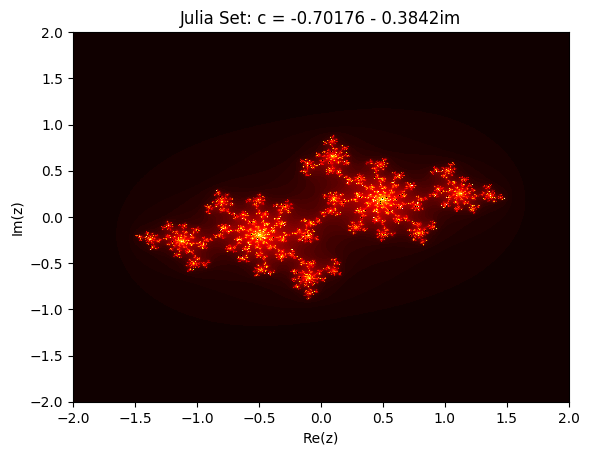

PyObject <matplotlib.collections.QuadMesh object at 0x7fafb7a57ad0>

In [9]:
c = -0.70176-0.3842im
j3(z) = juliamap(c, z)
jp3 = j3.(cplane.z)

figure(4)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp3, cmap=PyPlot.cm_get_cmap("hot"))

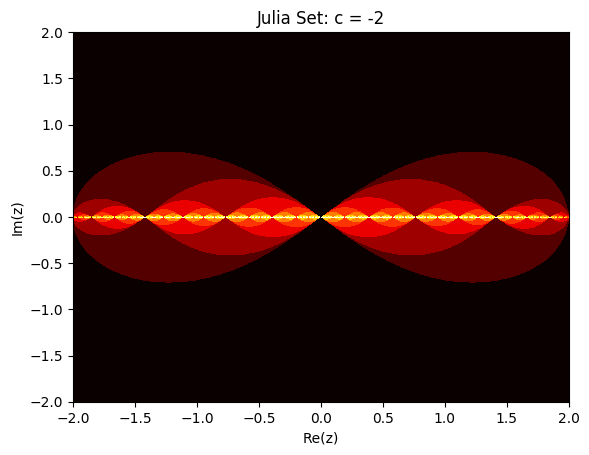

PyObject <matplotlib.collections.QuadMesh object at 0x7fafb799f290>

In [10]:
c = -2
j3(z) = juliamap(c, z)
jp3 = j3.(cplane.z)

figure(5)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp3, cmap=PyPlot.cm_get_cmap("hot"))

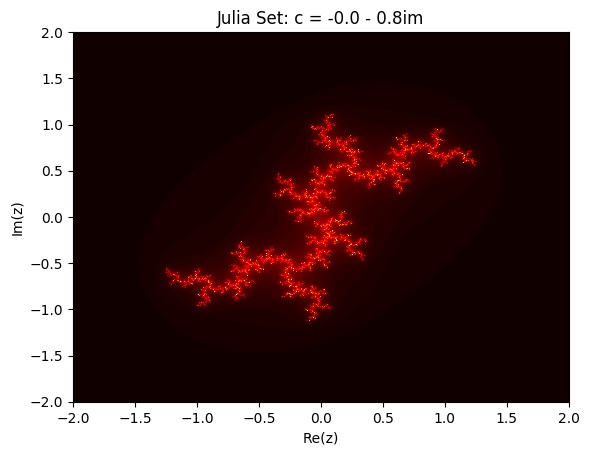

PyObject <matplotlib.collections.QuadMesh object at 0x7fafb78d8410>

In [11]:
c = -0.8im
j3(z) = juliamap(c, z)
jp3 = j3.(cplane.z)

figure(6)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp3, cmap=PyPlot.cm_get_cmap("hot"))

Note: The examples of julia sets come from https://en.wikipedia.org/wiki/Julia_set and http://mathworld.wolfram.com/JuliaSet.html.